# EXERCISE 7, PCA (Face Image Dataset)

In this exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset3 X of face images, each 32 × 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024). Let's load the data first.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load data from matlab file 
import scipy.io
data = scipy.io.loadmat('ex7faces.mat')

X = data['X']
print('X Shape', X.shape)

X Shape (5000, 1024)


Define a function to plot 100 images

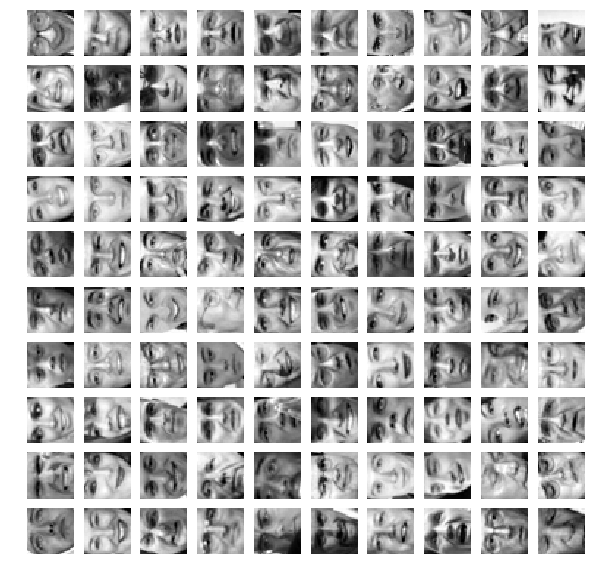

In [56]:
def displayData(A):
    #shows 100 images in 10x10 grid
    fig=plt.figure(figsize=(10, 10))
    columns = 10
    rows = 10
    idx = 0
    for i in range(1, columns*rows +1):
        img = A[idx]
        img = img.reshape((32, 32))
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        idx+=1
    plt.show()

displayData(X[0:100,:])

Let's use PCA to reduce the dimension of the dataset from 1024 to say 100

In [57]:
pca = PCA(n_components=100)  # experiment with this value!!
pca.fit(X)
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (5000, 1024)
transformed shape: (5000, 100)


Use X_pca to 'reconstruct' the image back into the higher dimension.
Here we visualise the 'loss' which is actually remarkably low.

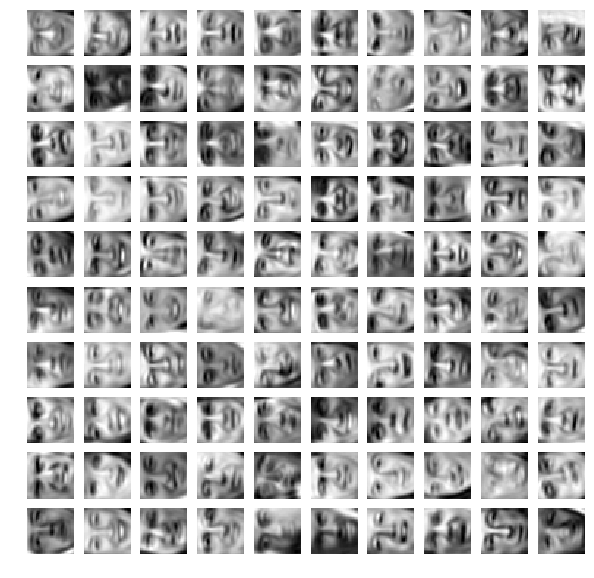

In [58]:
X_new = pca.inverse_transform(X_pca)
displayData(X_new[0:100,:])

This remarkable reduction (more than 10×) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (gven a face image, predict the identitfy of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

_** This (faces) dataset was based on a cropped version of the labeled faces in the wild dataset_